In [12]:
import requests

def fetch_wikipedia_page(title):
    url = f"https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "extracts",
        "format": "json",
        "titles": title,
        "exintro": True  # Get only the introduction
    }
    response = requests.get(url, params=params)
    data = response.json()
    page = next(iter(data["query"]["pages"].values()))
    return page.get("extract", "")

# Example usage
content = fetch_wikipedia_page("Aboul-Qacem_Echebbi")
print(content)


<link rel="mw-deduplicated-inline-style" href="mw-data:TemplateStyles:r1236091366">

<p><b>Aboul-Qacem Echebbi</b> (Arabic: <span lang="ar" dir="rtl">أبو القاسم الشابي</span>, <small>ALA-LC:</small> <span title="American Library Association – Library of Congress transliteration"><i lang="ar-Latn">Abū al-Qāsim al-Shābbī</i></span>; 24 February 1909 – 9 October 1934) was a Tunisian poet. He is probably best known for writing the final two verses of the current National Anthem of Tunisia, <i>Humat al-Hima</i> (<i>Defenders of the Homeland</i>), which was originally written by the Egyptian poet Mustafa Sadik el-Rafii.
</p>


In [13]:
def fetch_wikipedia_links(title):
    url = f"https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "links",
        "format": "json",
        "titles": title,
        "pllimit": "max"  # Limit to maximum number of links
    }
    response = requests.get(url, params=params)
    data = response.json()
    page = next(iter(data["query"]["pages"].values()))
    links = [link['title'] for link in page.get('links', [])]
    return links

# Example usage
links = fetch_wikipedia_links("Aboul-Qacem_Echebbi")
print(links)


['2011 Egyptian revolution', 'ALA-LC romanization', 'Ain Shams University', 'Al-Tijani Yusuf Bashir', 'Ameen Rihani', 'Arab Spring', 'Arab literature', 'Arabic language', 'Avant-garde', 'Baccalauréat', 'Cairo', 'Colonel', 'Egypt', 'Engineer', 'French Tunisia', 'Humat al-Hima', 'Ila Tughat al-Alam', 'Judge', 'Kahlil Gibran', "Mostafa Saadeq Al-Rafe'ie", 'Myocarditis', 'Nahda', 'Neo-romanticism', 'Patriotism', 'Romantic literature', 'Shawqi Daif', 'Tozeur', 'Tunis', 'Tunisia', 'Tunisian Revolution', 'Tunisian dinar', 'Tunisian revolution', 'University of Ez-Zitouna', 'Wayback Machine', 'Talk:Aboul-Qacem Echebbi', 'Wikipedia:Copying within Wikipedia', 'Wikipedia:Translation', 'Wikipedia:Verifiability', 'Help:Authority control', 'Help:Edit summary', 'Help:Interlanguage links', 'Help:Maintenance template removal', 'Help:Referencing for beginners', 'Category:Articles needing additional references from December 2009', 'Category:Articles with BIBSYS identifiers', 'Category:Articles with BNE id

In [17]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on your data
def add_edges_from_links(base_article, links):
    for link in links:
        G.add_edge(base_article, link)

# Example usage
base_article = "Aboul-Qacem_Echebbi"
links = fetch_wikipedia_links(base_article)
add_edges_from_links(base_article, links)

# Add more nodes and edges as needed


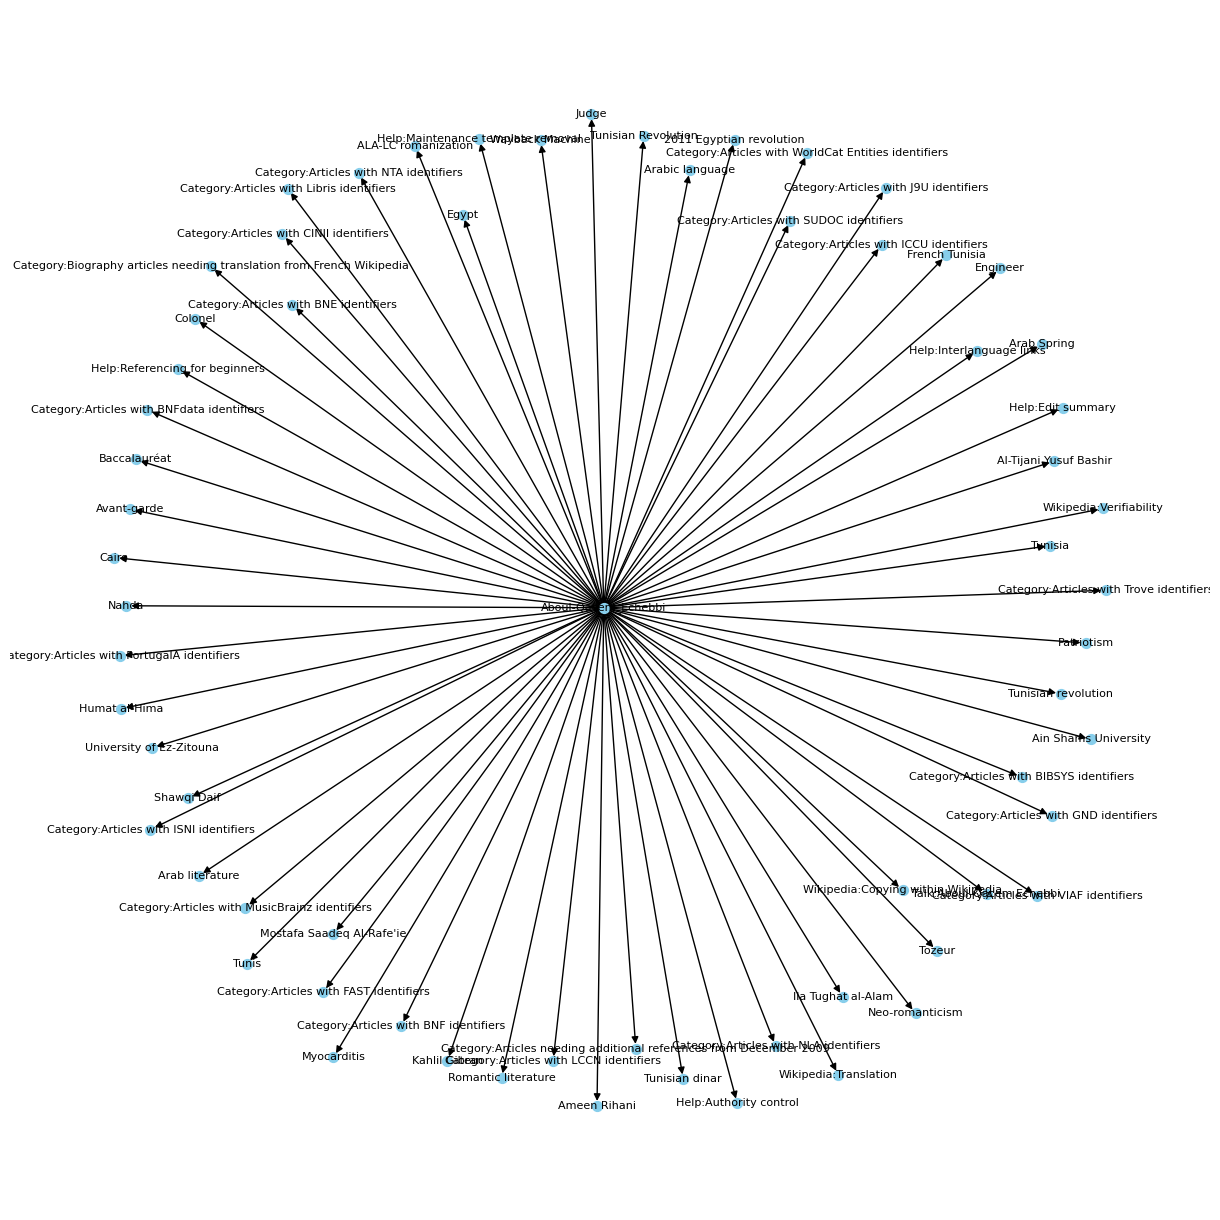

In [18]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=50, font_size=8, node_color="skyblue", font_color="black")
plt.show()


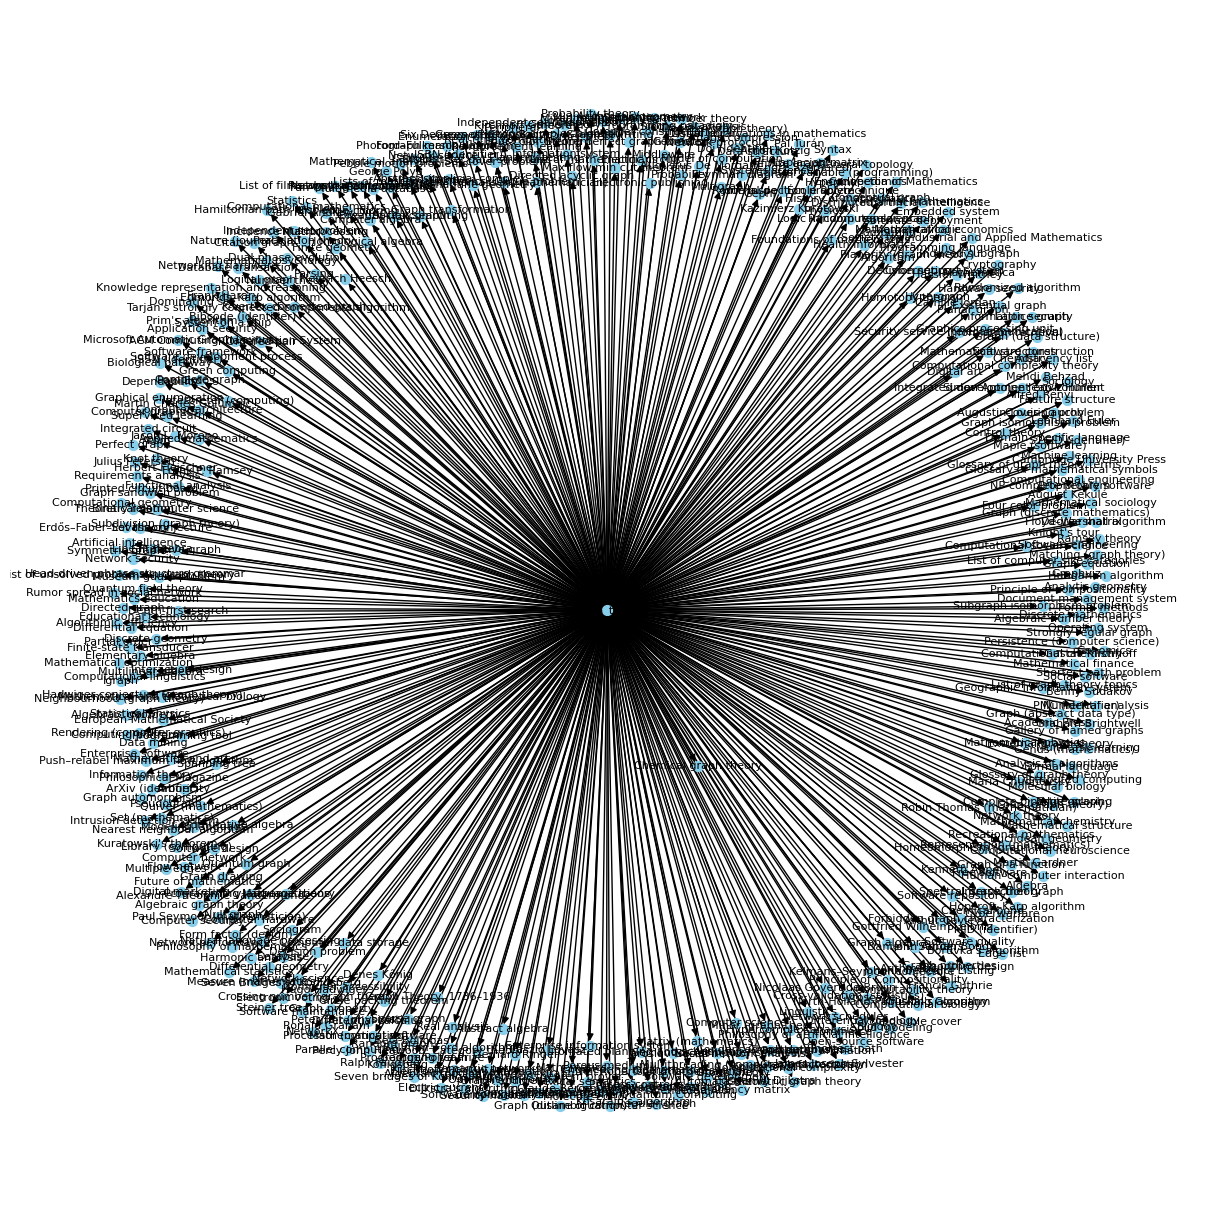

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Example data
base_article = "Graph_theory"
links = fetch_wikipedia_links(base_article)
add_edges_from_links(base_article, links)

# Generate positions for nodes
pos = nx.spring_layout(G)  # You can use other layouts if you prefer

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, node_color="skyblue", font_color="black")
plt.show()


In [7]:
import networkx as nx
import plotly.graph_objects as go

# Create a directed graph
G = nx.DiGraph()

# Example data
base_article = "Graph_theory"
links = fetch_wikipedia_links(base_article)
add_edges_from_links(base_article, links)

# Generate positions for nodes
pos = nx.spring_layout(G)

# Prepare edge and node data
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

fig = go.Figure()

fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(width=0.5, color='#888')))

# Add nodes
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers+text', text=[node for node in G.nodes()], textposition='top center', marker=dict(size=10, color='skyblue')))

fig.update_layout(showlegend=False)
fig.show()


In [8]:
import requests
import csv

def fetch_wikipedia_page_info(title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "info",
        "format": "json",
        "titles": title,
        "inprop": "url|id"
    }
    response = requests.get(url, params=params)
    data = response.json()
    pages = data['query']['pages']
    page_info = {}
    for page_id, page in pages.items():
        page_info['id'] = page['pageid']
        page_info['title'] = page['title']
        page_info['url'] = f"https://en.wikipedia.org/?curid={page['pageid']}"
    return page_info

def fetch_wikipedia_links_with_ids(title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "prop": "links",
        "format": "json",
        "titles": title,
        "pllimit": "max",
        "plprop": "title|pageid"  # Request page ID in addition to title
    }
    response = requests.get(url, params=params)
    data = response.json()
    pages = data['query']['pages']
    links = []
    for page_id, page in pages.items():
        links = page.get('links', [])
        for link in links:
            links.append({'title': link['title'], 'pageid': link['pageid']})
    return links

# Example usage
base_page_info = fetch_wikipedia_page_info("Graph_theory")
base_page_id = base_page_info['id']
links_with_ids = fetch_wikipedia_links_with_ids("Graph_theory")


KeyError: 'pageid'

In [ ]:
import csv

def save_to_csv(base_page_info, links_with_ids):
    base_title = base_page_info['title']
    filename = f"{base_title.replace(' ', '_')}.csv"  # Replace spaces with underscores

    with open(filename, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(['Base Page ID', 'Base Page Title', 'Base Page URL', 'Link Title', 'Link Page ID'])

        for link in links_with_ids:
            writer.writerow([
                base_page_info['id'],
                base_page_info['title'],
                base_page_info['url'],
                link['title'],
                link['pageid']
            ])

    print(f"Data saved to {filename}")

# Example usage
save_to_csv(base_page_info, links_with_ids)
